# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [377]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [378]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [462]:
df = pd.read_csv('/content/drive/MyDrive/Colab/T5Bootcamp/Week2/Datasets/Copy of RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [380]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [381]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [382]:
df.shape

(12316, 32)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [384]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [385]:
df.duplicated().sum()

0

In [386]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [387]:
df.Educational_level.unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [388]:
df.Educational_level.value_counts()

,count
Educational_level,
Junior high school,7619
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


In [389]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)

In [390]:
df.Vehicle_driver_relation.unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [391]:
df.Vehicle_driver_relation.value_counts()

,count
Vehicle_driver_relation,
Employee,9627
Owner,1973
Other,123
Unknown,14


In [392]:
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0], inplace=True)

In [393]:
df.Driving_experience.unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [394]:
df.Driving_experience.value_counts()

,count
Driving_experience,
5-10yr,3363
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


In [395]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)

In [396]:
df.Type_of_vehicle.unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [397]:
df.Type_of_vehicle.value_counts()

,count
Type_of_vehicle,
Automobile,3205
Lorry (41?100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11?40Q),541
Public (13?45 seats),532
Public (> 45 seats),404


In [398]:
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)

In [399]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [400]:
df.Owner_of_vehicle.unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [401]:
df.Owner_of_vehicle.value_counts()

,count
Owner_of_vehicle,
Owner,10459
Governmental,1041
Organization,312
Other,22


In [402]:
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0], inplace=True)

In [403]:
df.drop(columns=['Service_year_of_vehicle','Work_of_casuality'],inplace=True)

In [404]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Defect_of_vehicle,4427


In [405]:
df.Age_band_of_casualty.unique()

array(['na', '31-50', '18-30', 'Under 18', 'Over 51', '5'], dtype=object)

In [406]:
df.Age_band_of_casualty.value_counts()

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994
5,244


In [407]:
df.drop(columns=['Age_band_of_casualty'],inplace=True)

In [408]:
df.Defect_of_vehicle.unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [409]:
df.Defect_of_vehicle.value_counts()

,count
Defect_of_vehicle,
No defect,7777
7,76
5,36


In [410]:
df.drop(columns=['Defect_of_vehicle'],inplace=True)

In [411]:
df.Fitness_of_casuality.unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [412]:
df.Fitness_of_casuality.value_counts()

,count
Fitness_of_casuality,
Normal,9608
NormalNormal,19
Deaf,18
Other,18
Blind,18


In [413]:
df.drop(columns=['Fitness_of_casuality'],inplace=True)

In [414]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,239


In [415]:
for column in df.columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

In [416]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [417]:
for column in df.columns:
  print(column)
  print(df[column].unique())
  print()

Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

Sex_of_driver
['Male' 'Female' 'Unknown']

Educational_level
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' 'Other']

Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']

Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

Owner_of_vehicle
['Owner' 'Governmental' 'Organization' 'Other']

Area_accident_occured
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industria

In [418]:
for column in df.columns:
  if df[column].astype(str).str.contains('na').any():
    print(column)
    print(df[column].unique())
    print(df[column].value_counts())
    print()


Area_accident_occured
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas' 'Unknown'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational areas']
Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

Casualty_class
['na' 'Driver or rider' 'Pedestrian' 'Passenger']
Casualty_class
Driver or rider    494

In [419]:
df.drop(columns=['Casualty_severity','Sex_of_casualty','Casualty_class'],inplace=True)

In [420]:
for column in df.columns:
  if df[column].astype(str).str.contains('na').any():
    print(column)


Area_accident_occured


In [421]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [422]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [423]:
for column in df.columns:
    if df[column].astype(str).str.contains('Unknown').any():
        print(column)
        print(df[column].unique())
        print(df[column].value_counts())
        print()

Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

Sex_of_driver
['Male' 'Female' 'Unknown']
Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

Educational_level
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Educational_level
Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' 'Other']
Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64

Area_accident_occured
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other

In [424]:
for column in df.columns:
  if df[column].astype(str).str.contains('Unknown').any():
    df[column].replace('Unknown', df[column].mode()[0],inplace=True)


In [425]:
for column in df.columns:
    if df[column].astype(str).str.contains('Unknown').any():
        print(column)

        print()

Pedestrian_movement



In [426]:
df.Pedestrian_movement.unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [427]:
df['Pedestrian_movement'].replace('Unknown or other', df['Pedestrian_movement'].mode()[0],inplace=True)

In [428]:
for column in df.columns:
    if df[column].astype(str).str.contains('Unknown').any():
        print(column)

        print()

In [429]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int32 
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [431]:
df.shape

(12316, 24)

In [432]:
df = pd.get_dummies(df, columns=['Sex_of_driver', 'Day_of_week'])


In [433]:
df.columns

Index(['Time', 'Age_band_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Sex_of_driver_Female',
       'Sex_of_driver_Male', 'Day_of_week_Friday', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday'],
      dtype='object')

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int32 
 1   Age_band_of_driver           12316 non-null  object
 2   Educational_level            12316 non-null  object
 3   Vehicle_driver_relation      12316 non-null  object
 4   Driving_experience           12316 non-null  object
 5   Type_of_vehicle              12316 non-null  object
 6   Owner_of_vehicle             12316 non-null  object
 7   Area_accident_occured        12316 non-null  object
 8   Lanes_or_Medians             12316 non-null  object
 9   Road_allignment              12316 non-null  object
 10  Types_of_Junction            12316 non-null  object
 11  Road_surface_type            12316 non-null  object
 12  Road_surface_conditions      12316 non-null  object
 13  Light_conditions             12

In [435]:
for col in df.columns:
  if col != 'Accident_severity':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [436]:
for column in df.columns:
  if df[column].dtype == bool:
    df[column] = df[column].astype(int)


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Age_band_of_driver           12316 non-null  int64 
 2   Educational_level            12316 non-null  int64 
 3   Vehicle_driver_relation      12316 non-null  int64 
 4   Driving_experience           12316 non-null  int64 
 5   Type_of_vehicle              12316 non-null  int64 
 6   Owner_of_vehicle             12316 non-null  int64 
 7   Area_accident_occured        12316 non-null  int64 
 8   Lanes_or_Medians             12316 non-null  int64 
 9   Road_allignment              12316 non-null  int64 
 10  Types_of_Junction            12316 non-null  int64 
 11  Road_surface_type            12316 non-null  int64 
 12  Road_surface_conditions      12316 non-null  int64 
 13  Light_conditions             12

In [438]:
df.Accident_severity.value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [439]:
ord_enc = OrdinalEncoder(categories=[['Slight Injury', 'Serious Injury', 'Fatal injury']])
df['Accident_severity'] = ord_enc.fit_transform(df[['Accident_severity']])
df.head()


,Time,Age_band_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Accident_severity,Sex_of_driver_Female,Sex_of_driver_Male,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,17,0,0,0,0,0,3,9,2,5,...,0.0,0,1,0,1,0,0,0,0,0
1,17,1,4,0,3,11,3,6,4,5,...,0.0,0,1,0,1,0,0,0,0,0
2,17,0,4,0,0,5,3,1,5,5,...,1.0,0,1,0,1,0,0,0,0,0
3,1,0,4,0,2,11,0,6,5,6,...,0.0,0,1,0,0,0,1,0,0,0
4,1,0,4,0,1,0,3,4,5,5,...,0.0,0,1,0,0,0,1,0,0,0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

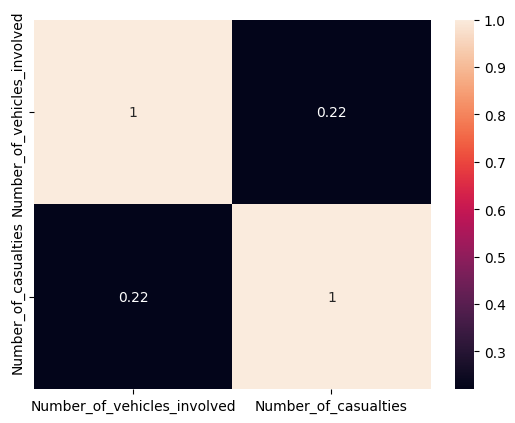

In [440]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

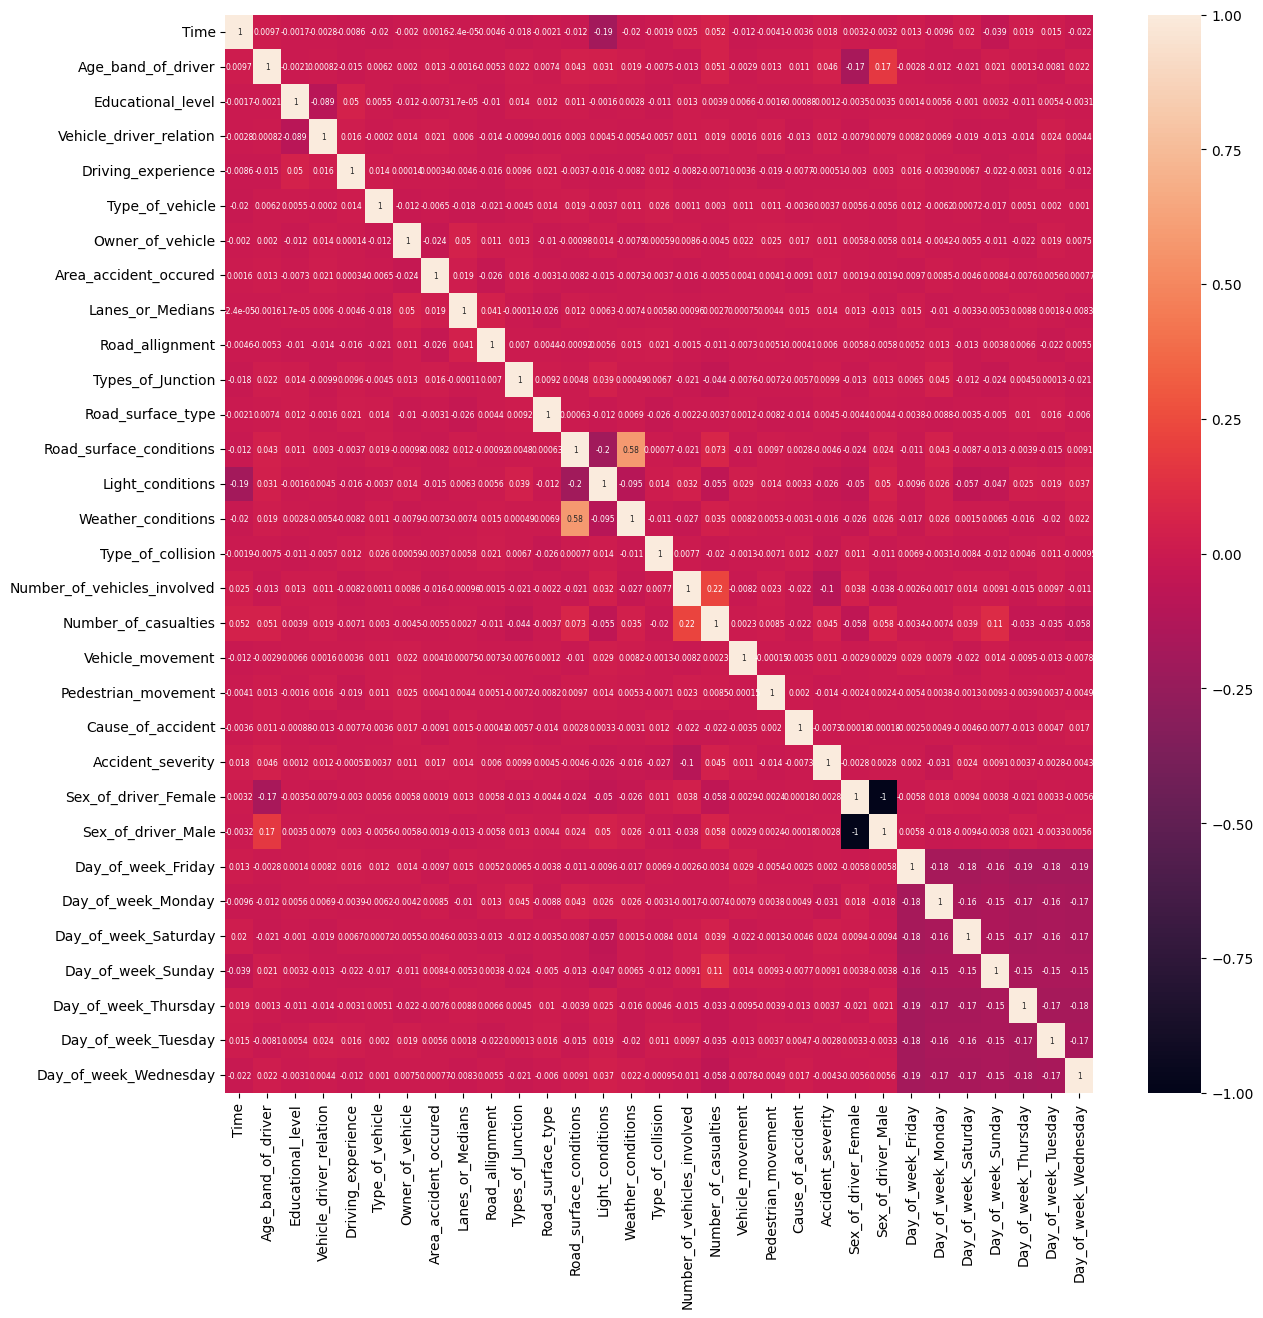

In [441]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True,annot_kws={"size":5.5})
plt.show()

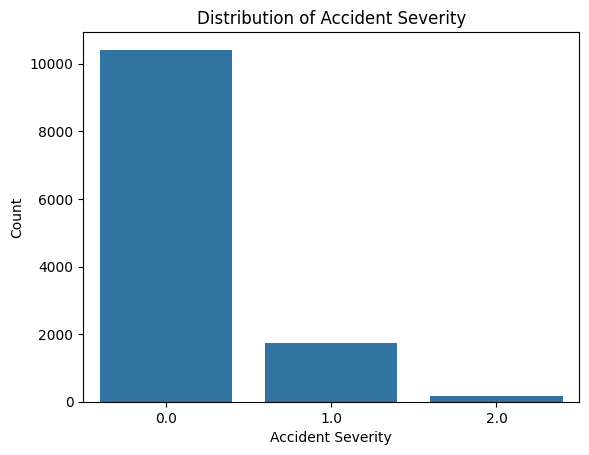

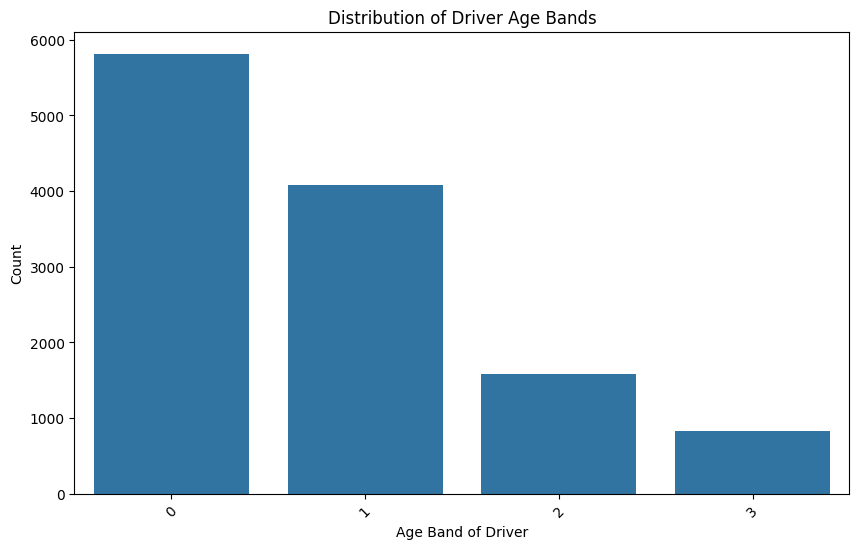

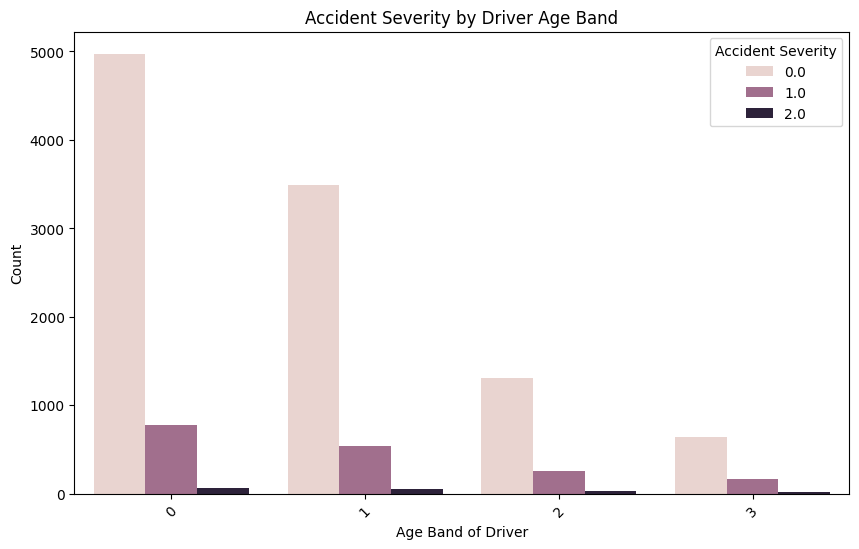

In [442]:

sns.countplot(x='Accident_severity', data=df)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', data=df)
plt.title('Distribution of Driver Age Bands')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df)
plt.title('Accident Severity by Driver Age Band')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()


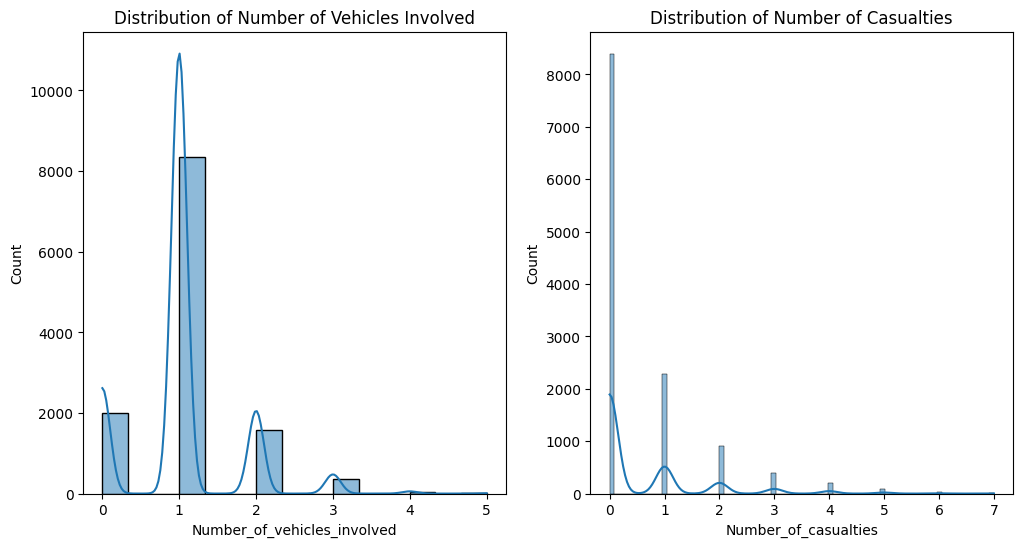

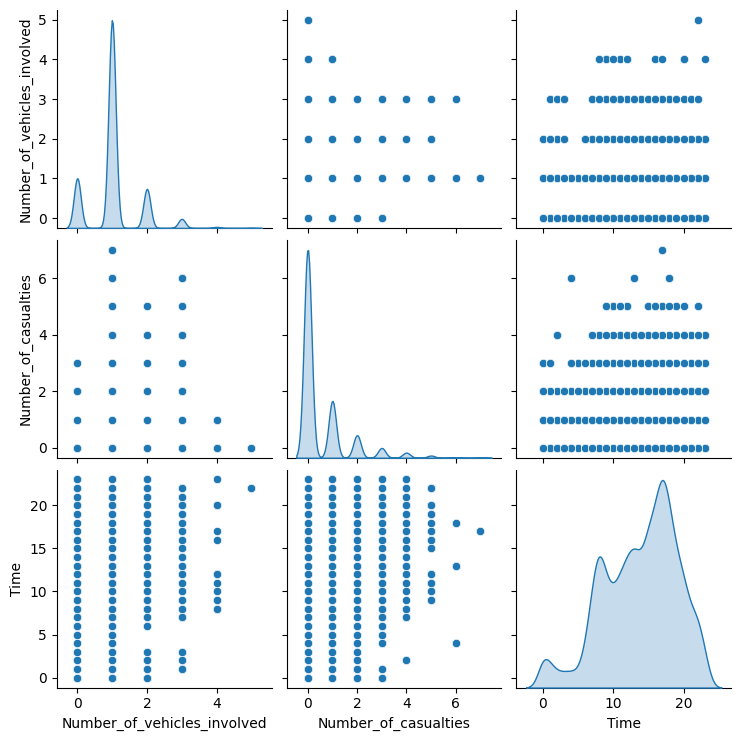

In [443]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Number_of_vehicles_involved'], kde=True)
plt.title('Distribution of Number of Vehicles Involved')
plt.subplot(1, 2, 2)
sns.histplot(df['Number_of_casualties'], kde=True)
plt.title('Distribution of Number of Casualties')
plt.show()

sns.pairplot(df[['Number_of_vehicles_involved', 'Number_of_casualties', 'Time']], diag_kind='kde')
plt.show()


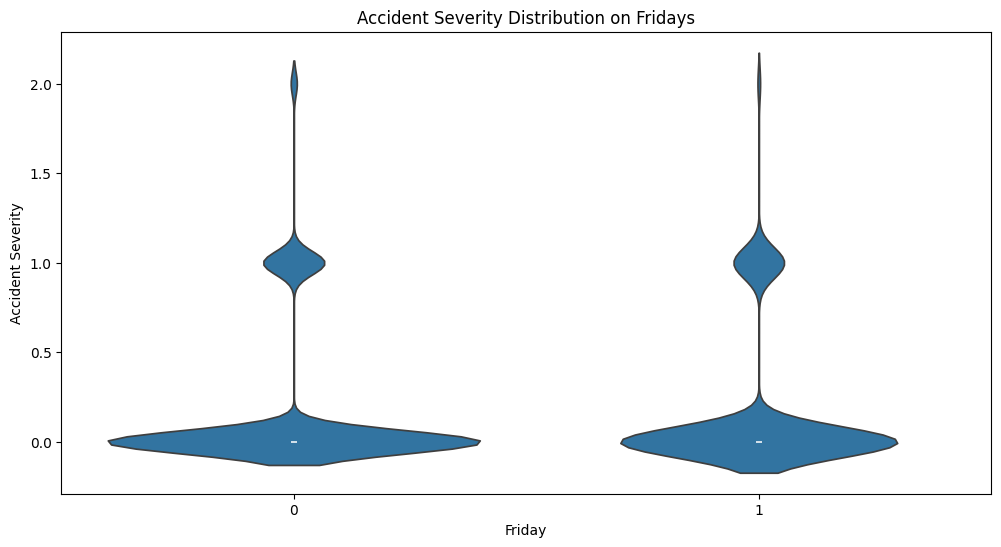

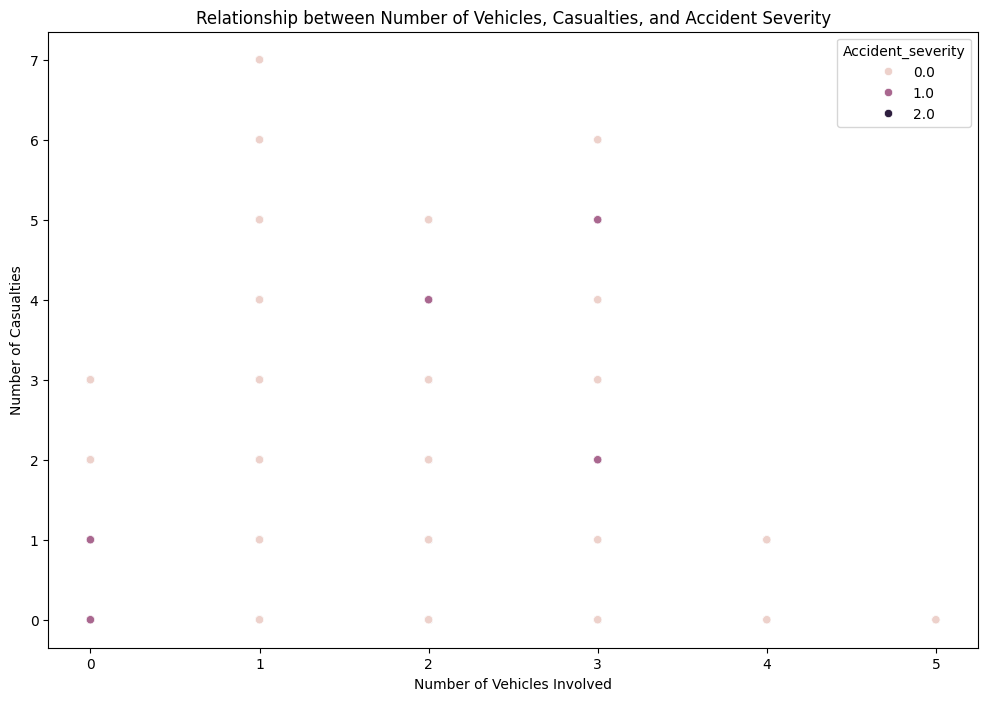

In [444]:
# ###

plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_severity', y='Number_of_vehicles_involved', data=df)
plt.title('Number of Vehicles Involved vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Vehicles Involved')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Day_of_week_Friday', y='Accident_severity', data=df)
plt.title('Accident Severity Distribution on Fridays')
plt.xlabel('Friday')
plt.ylabel('Accident Severity')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', hue='Accident_severity', data=df)
plt.title('Relationship between Number of Vehicles, Casualties, and Accident Severity')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()


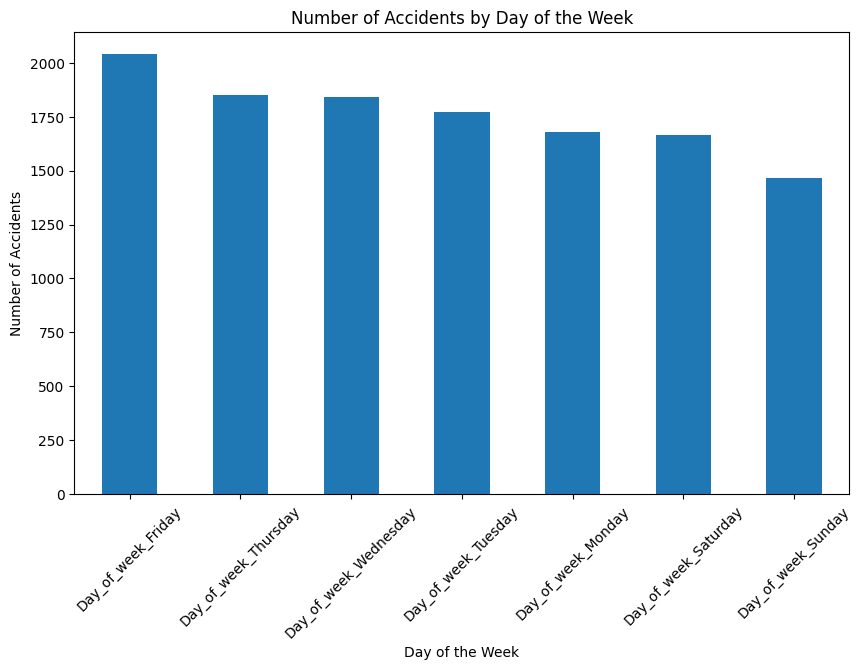

In [445]:

accidents_by_day = df[['Day_of_week_Monday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
                       'Day_of_week_Thursday', 'Day_of_week_Friday', 'Day_of_week_Saturday',
                       'Day_of_week_Sunday']].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [446]:
corr = df.corr()['Accident_severity'].sort_values(ascending=False)
print(corr)

Accident_severity              1.000000
Age_band_of_driver             0.046447
Number_of_casualties           0.045339
Day_of_week_Saturday           0.023664
Time                           0.018065
Area_accident_occured          0.017308
Lanes_or_Medians               0.013926
Vehicle_driver_relation        0.012428
Owner_of_vehicle               0.010960
Vehicle_movement               0.010885
Types_of_Junction              0.009880
Day_of_week_Sunday             0.009102
Road_allignment                0.005967
Road_surface_type              0.004510
Type_of_vehicle                0.003709
Day_of_week_Thursday           0.003664
Sex_of_driver_Male             0.002756
Day_of_week_Friday             0.002035
Educational_level              0.001227
Driving_experience            -0.000509
Sex_of_driver_Female          -0.002756
Day_of_week_Tuesday           -0.002799
Day_of_week_Wednesday         -0.004270
Road_surface_conditions       -0.004579
Cause_of_accident             -0.007311


In [447]:
columns = [
    "Cause_of_accident",
    "Pedestrian_movement",
    "Weather_conditions",
    "Light_conditions",
    "Type_of_collision",
    "Day_of_week_Monday",
    "Number_of_vehicles_involved",
    "Age_band_of_driver",
    "Number_of_casualties",
    "Day_of_week_Saturday",
    "Time",
    "Area_accident_occured",
    "Lanes_or_Medians",
    "Vehicle_driver_relation",
    "Owner_of_vehicle",
    "Vehicle_movement",
    "Types_of_Junction",
    "Day_of_week_Sunday",
    "Road_allignment",
    "Road_surface_type",
    "Type_of_vehicle",
    "Day_of_week_Thursday",
    "Sex_of_driver_Male",
    "Day_of_week_Friday",
    "Educational_level"
]
X = df[columns]
y = df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [448]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [449]:

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

#### Decision Tree Classifier

In [450]:
pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier())
])

pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('dt', DecisionTreeClassifier())])

#### Support Vector Machine (SVM)

In [486]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

#### K-Neighbors Classifier

In [477]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [453]:
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

In [454]:
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_lr))
print()
print("Accuracy:")
print(accuracy_score(y_test, y_pred_lr))
print()
print("recall score: ")
print(recall_score(y_test, y_pred_lr,average='macro'))
print()
print("precision score: ")
print(precision_score(y_test, y_pred_lr,average='macro'))
print()
print("f1 score: ")
print(f1_score(y_test, y_pred_lr,average='macro'))

Logistic Regression:
Confusion Matrix: 
[[2064    0    0]
 [ 363    0    0]
 [  37    0    0]]

Accuracy:
0.8376623376623377

recall score: 
0.3333333333333333

precision score: 
0.2792207792207792

f1 score: 
0.303886925795053


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC for class 0: 0.5919731104651162
AUC for class 1: 0.5751452476388654
AUC for class 2: 0.7087384046592946


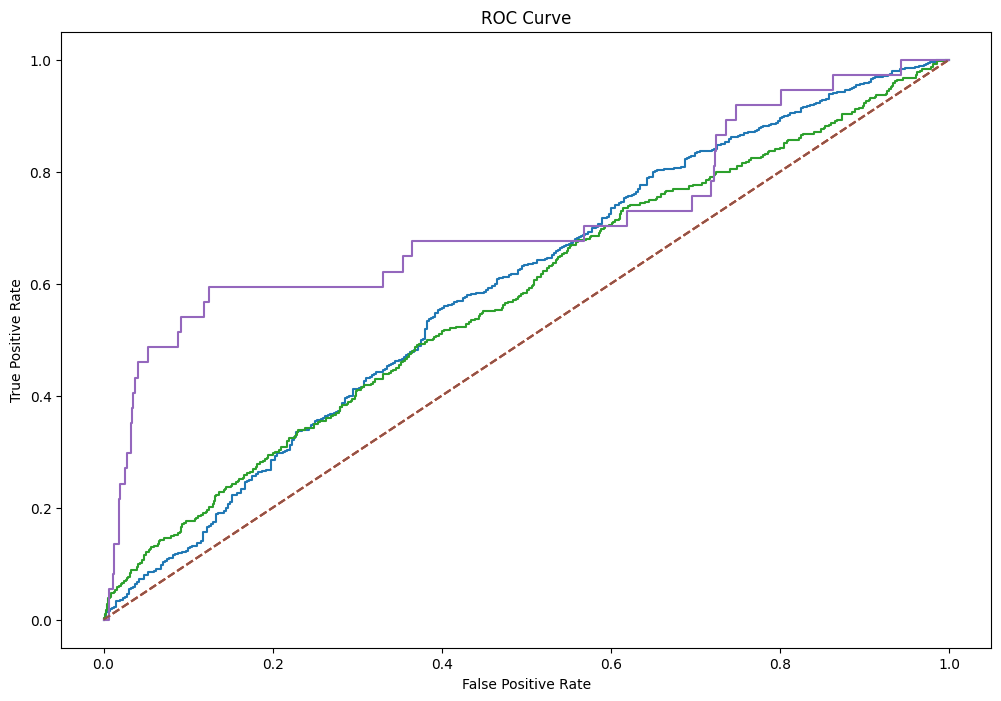

In [455]:
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)
plt.figure(figsize=(12, 8))
for i in range(3):
    plot_roc_curve(y_test == i, y_pred_proba_lr[:, i])
    print(f"AUC for class {i}: {auc(roc_curve(y_test == i, y_pred_proba_lr[:, i])[0], roc_curve(y_test == i, y_pred_proba_lr[:, i])[1])}")
plt.show()


In [456]:
y_pred_dt = pipeline_dt.predict(X_test)

print(" Decision Tree Classifier:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_dt))
print()
print("Accuracy:")
print(accuracy_score(y_test, y_pred_dt))
print()
print("recall score: ")
print(recall_score(y_test, y_pred_dt,average='macro'))
print()
print("precision score: ")
print(precision_score(y_test, y_pred_dt,average='macro'))
print()
print("f1 score: ")
print(f1_score(y_test, y_pred_dt,average='macro'))

 Decision Tree Classifier:
Confusion Matrix: 
[[1746  295   23]
 [ 264   92    7]
 [  25    5    7]]

Accuracy:
0.7487824675324676

recall score: 
0.4295209826393758

precision score: 
0.42728944157515586

f1 score: 
0.42827096656830616


AUC for class 0: 0.5617151162790697
AUC for class 1: 0.5553271890730244
AUC for class 2: 0.5884141248788962


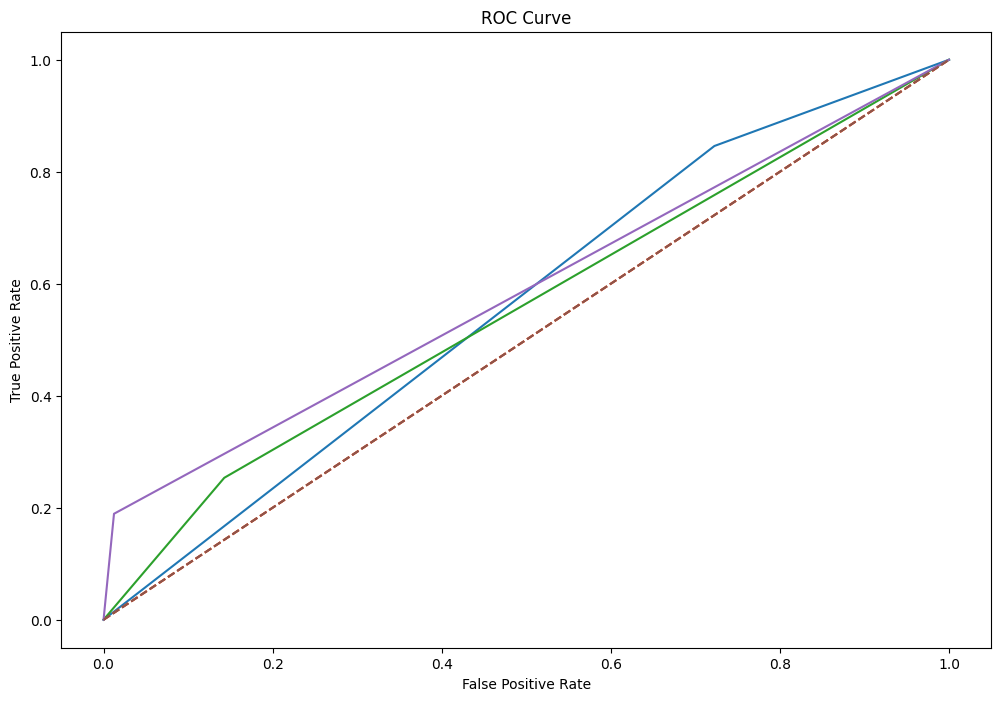

In [457]:
y_pred_dt = pipeline_dt.predict_proba(X_test)
plt.figure(figsize=(12, 8))
for i in range(3):
    plot_roc_curve(y_test == i, y_pred_dt[:, i])
    print(f"AUC for class {i}: {auc(roc_curve(y_test == i, y_pred_dt[:, i])[0], roc_curve(y_test == i, y_pred_dt[:, i])[1])}")
plt.show()


In [484]:
y_pred_svm = pipeline_svm.predict(X_test)

print(" Support Vector Machine:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_svm))
print()
print("Accuracy:")
print(accuracy_score(y_test, y_pred_svm))
print()
print("recall score: ")
print(recall_score(y_test, y_pred_svm,average='macro'))
print()
print("precision score: ")
print(precision_score(y_test, y_pred_svm,average='macro'))
print()
print("f1 score: ")
print(f1_score(y_test, y_pred_svm,average='macro'))

 Support Vector Machine:
Confusion Matrix: 
[[2042   21    1]
 [ 347   16    0]
 [  37    0    0]]

Accuracy:
0.8352272727272727

recall score: 
0.3444727400858479

precision score: 
0.4247157297445838

f1 score: 
0.3298589458054937


AUC for class 0: 0.5823037790697674
AUC for class 1: 0.5926549472047288
AUC for class 2: 0.7631822180647891


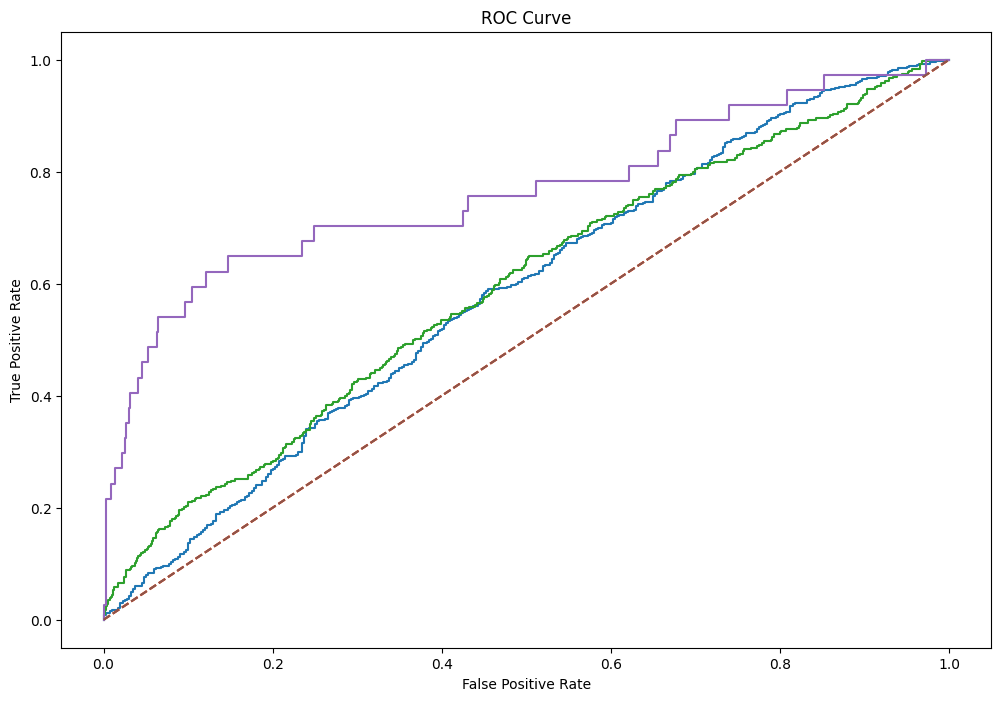

In [485]:
y_pred_svm = pipeline_svm.predict_proba(X_test)
plt.figure(figsize=(12, 8))
for i in range(3):
    plot_roc_curve(y_test == i, y_pred_svm[:, i])
    print(f"AUC for class {i}: {auc(roc_curve(y_test == i, y_pred_svm[:, i])[0], roc_curve(y_test == i, y_pred_svm[:, i])[1])}")
plt.show()

In [478]:
y_pred_knn = pipeline_knn.predict(X_test)
print(" K-Nearest Neighbors:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_knn))
print()
print("Accuracy:")
print(accuracy_score(y_test, y_pred_knn))
print()
print("recall score: ")
print(recall_score(y_test, y_pred_knn,average='macro'))
print()
print("precision score: ")
print(precision_score(y_test, y_pred_knn,average='macro'))
print()
print("f1 score: ")
print(f1_score(y_test, y_pred_knn,average='macro'))


 K-Nearest Neighbors:
Confusion Matrix: 
[[2023   40    1]
 [ 353   10    0]
 [  35    1    1]]

Accuracy:
0.825487012987013

recall score: 
0.34490363176938227

precision score: 
0.5117164520999883

f1 score: 
0.334575102746101


AUC for class 0: 0.577797359496124
AUC for class 1: 0.5674255863992352
AUC for class 2: 0.6564271317052528


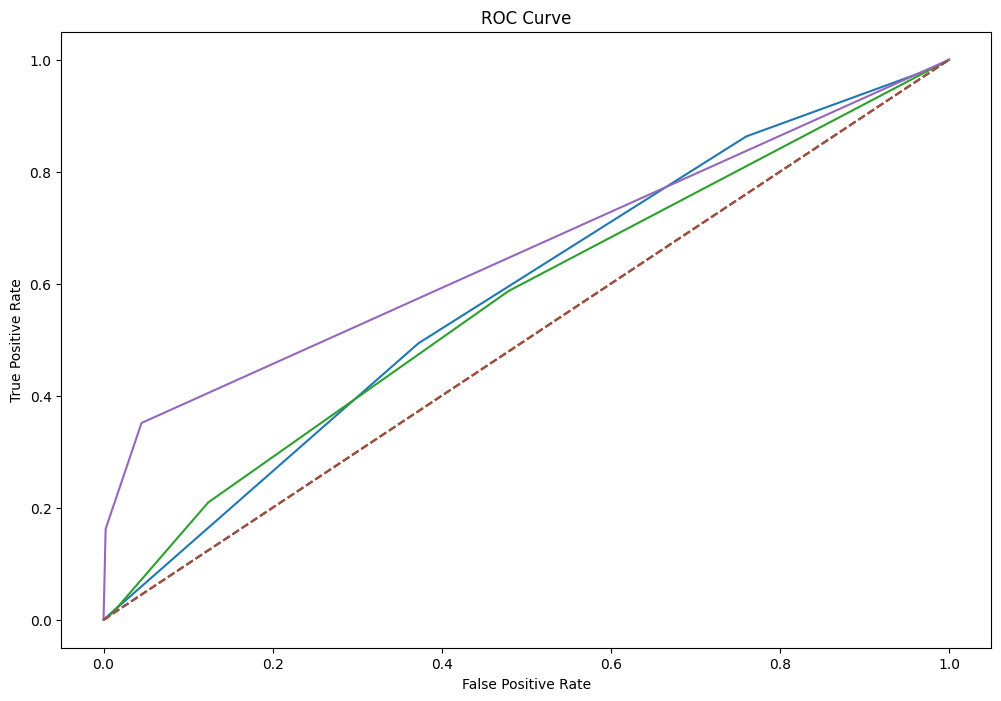

In [479]:
y_pred_knn = pipeline_knn.predict_proba(X_test)
plt.figure(figsize=(12, 8))
for i in range(3):
    plot_roc_curve(y_test == i, y_pred_knn[:, i])
    print(f"AUC for class {i}: {auc(roc_curve(y_test == i, y_pred_knn[:, i])[0], roc_curve(y_test == i, y_pred_knn[:, i])[1])}")
plt.show()

### additional

In [480]:
cv_scores = cross_val_score(pipeline_svm, X_train, y_train, cv=10,)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.84787018 0.84685598 0.84771574 0.84771574 0.84771574 0.84771574
 0.84771574 0.84771574 0.84771574 0.84771574]
Mean cross-validation score: 0.8476452054653473


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [481]:

# After evaluating the models based on accuracy, precision, recall, and F1-score, it appears that the Support Vector Classifier performs the best on this dataset.
  # It shows the highest accuracy and a good balance between precision and recall.



In [ ]:
# Evaluate Trade-offs

# Computational Efficiency:

# Logistic Regression and Decision Trees: Fast and efficient, suitable for medium-sized datasets.
# SVM (Support Vector Machine): Can be slow, especially with complex settings.
# KNN (K-Nearest Neighbors): Slow for large datasets because it compares each point to all others.


# Ease of Implementation:

# Logistic Regression and Decision Trees: Simple to set up and understand.
# SVM: More complicated, needs careful tuning to work well.
# KNN: Easy to set up but needs careful choice of parameters.


# Model Interpretability:

# Logistic Regression: Shows how each feature impacts the prediction clearly.
# Decision Trees: Easy to understand the decision-making process.
# SVM: Harder to interpret, especially with complex settings.
# KNN: Doesn't provide much insight into why a decision was made, just compares to nearby data points.


In [ ]:
# # Justify Your Choice:

# After comparing and evaluating the models based on accuracy, precision, recall,
#   and F1-score, the Support Vector Classifier (SVC) emerges as the best choice for this dataset.
# It shows the highest accuracy and a good balance between precision and recall,
#   making it the preferred model.
#SVC can effectively model non-linear relationships within the data through the use of kernel functions.
#   This allows it to capture intricate patterns that might be missed by simpler models like logistic regression.

In [ ]:
# Feature Importance
# Based on the correlation matrix analysis for the Support Vector Machine (SVM) model, the most important features are:

columns = [
    "Cause_of_accident",
    "Pedestrian_movement",
    "Weather_conditions",
    "Light_conditions",
    "Type_of_collision",
    "Day_of_week_Monday",
    "Number_of_vehicles_involved",
    "Age_band_of_driver",
    "Number_of_casualties",
    "Day_of_week_Saturday",
    "Time",
    "Area_accident_occured",
    "Lanes_or_Medians",
    "Vehicle_driver_relation",
    "Owner_of_vehicle",
    "Vehicle_movement",
    "Types_of_Junction",
    "Day_of_week_Sunday",
    "Road_allignment",
    "Road_surface_type",
    "Type_of_vehicle",
    "Day_of_week_Thursday",
    "Sex_of_driver_Male",
    "Day_of_week_Friday",
    "Educational_level"
]

# These features impact the predictions by providing crucial information about the circumstances surrounding the accident.
#  The SVM model learns to associate specific values or combinations of values for these features with different levels of accident severity.

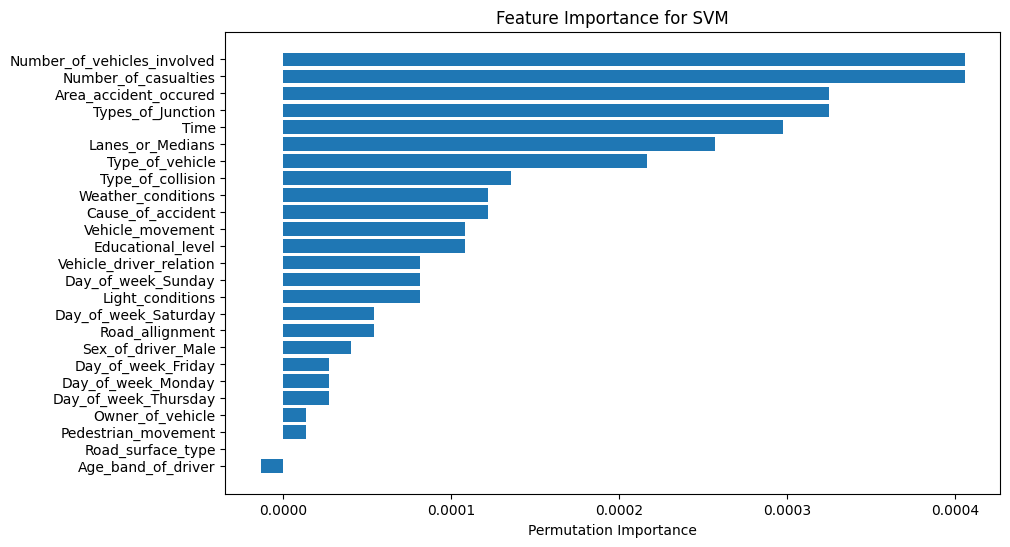

In [487]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline_svm, X_test, y_test, n_repeats=30, random_state=42)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for SVM")
plt.show()


In [ ]:
# Model Limitations

# Imbalanced Dataset: The dataset may have an uneven distribution of accident severity classes,
  # with some classes having significantly fewer instances than others. This can cause models to be biased towards the majority class, leading to poorer performance on the minority classes.

# Missing or Incomplete Data: There may be missing values or incomplete information for certain features in the dataset.
  # This can negatively impact the model's ability to learn accurate patterns and make reliable predictions.

# Outliers: The presence of outliers, or extreme values, in the dataset can distort the model's understanding of the relationships between features
  # and accident severity. This can result in inaccurate predictions, especially for cases that fall outside the typical range of values.

# Limited Feature Representation: The selected features might not fully capture all the relevant factors that contribute to accident severity.
  # Important factors such as road conditions, driver behavior, or vehicle maintenance may not be included in the dataset, limiting the model's ability to make accurate predictions.

In [ ]:
# Future Improvements
# 1. Hyperparameter Tuning: Fine-tune the hyperparameters of the best-performing model (SVM in this case) using techniques like GridSearchCV or RandomizedSearchCV. This can help optimize the model for better performance.

# Example:
param_grid = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(pipeline_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# 2. Feature Engineering: Explore creating new features or transforming existing ones to improve model performance. This could involve combining features or applying non-linear transformations to uncover hidden patterns.

# 3. Address Class Imbalance: If the dataset has an uneven distribution of accident severity classes, try techniques like oversampling, undersampling, or using cost-sensitive learning to improve model performance on minority classes.

# Example (Oversampling using SMOTE):

# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Explore Other Algorithms: Experiment with other machine learning algorithms like Neural Networks or Naive Bayes to see if they can achieve better results on the dataset. This can provide insights into different approaches and their effectiveness.

# 5. Data Cleaning and Preprocessing: Further investigate the dataset for missing values, outliers, or inconsistencies. Address these issues through imputation, outlier removal, or other appropriate techniques to ensure cleaner data for modeling.

# 6. Feature Selection: Re-evaluate the selected features and consider using different feature selection methods, such as recursive feature elimination or LASSO, to potentially identify a more optimal set of features for the model.

# These steps can help enhance the model's performance and reliability, leading to more accurate and robust predictions.









